### Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from petpropy import Pb, sigma_o, c_o, rho_o, mu_o, Bo, Rs

### InputsData

In [2]:
rs = 675 #SCF/STB
pres_sep = 100 #psia
temp_sep = 85 + 460 #oR
api = 31
gamma_gas = 0.95
temperature = 180 + 460 #oR
y_CO2 = 0.20
y_H2S = 0.1
pressures = np.arange(500, 10500, 500)

### Bubble Pressure Point

In [3]:
p_bubble = Pb.standing(rs, gamma_gas, temperature, api)
print(p_bubble)

2504.88357


In [4]:
p_bubble = Pb.standing(rs, gamma_gas, temperature, api, y_CO2=y_CO2, y_H2S=y_H2S)
print(p_bubble)

2174.37688


In [5]:
p_bubble = Pb.lasater(rs, gamma_gas, temperature, api)
print(p_bubble)

2523.47111


In [6]:
p_bubble = Pb.lasater(rs, gamma_gas, temperature, api, y_CO2=y_CO2, y_H2S=y_H2S)
print(p_bubble)

2190.51188


### Solution Gas-Oil Ratio

In [8]:
rs = Rs.standing(pressures, temperature, gamma_gas, api, Pb=2500)
print(rs)

[101.585 227.336 366.836 516.188 673.36  673.36  673.36  673.36  673.36
 673.36  673.36  673.36  673.36  673.36  673.36  673.36  673.36  673.36
 673.36  673.36 ]


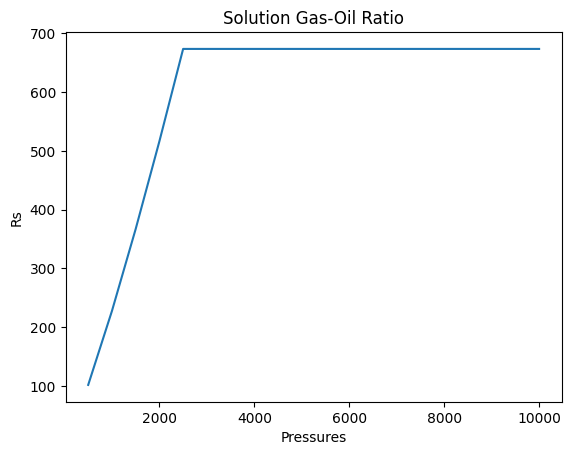

In [9]:
plt.plot(pressures, rs)
plt.title('Solution Gas-Oil Ratio')
plt.xlabel('Pressures')
plt.ylabel('Rs')
plt.show()

In [3]:
rs = Rs.vazquez(pressures, temperature, gamma_gas, api, Pb=2500, P_sp=pres_sep, T_sp=temp_sep)
print(rs)

[ 81.021 184.468 298.498 419.995 547.364 547.364 547.364 547.364 547.364
 547.364 547.364 547.364 547.364 547.364 547.364 547.364 547.364 547.364
 547.364 547.364]


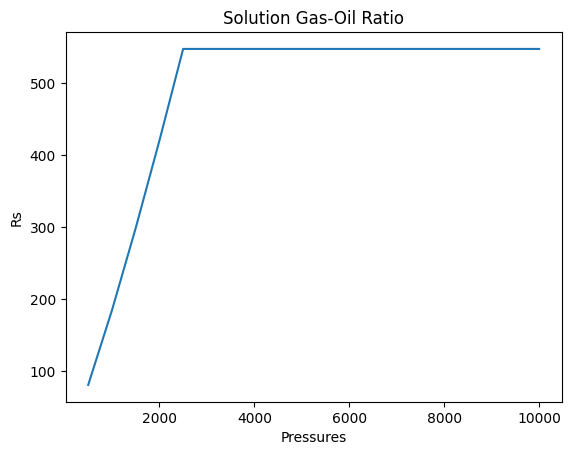

In [11]:
plt.plot(pressures, rs)
plt.title('Solution Gas-Oil Ratio')
plt.xlabel('Pressures')
plt.ylabel('Rs')
plt.show()

### Volumetric Factor Oil

In [14]:
bo = Bo.standing(temperature, rs, api, gamma_gas, P=pressures, Pb=2500, co=9.61e-6)
print(bo)

[1.11410915 1.16007032 1.21394286 1.27411102 1.33960627 1.3331849
 1.32679431 1.32043436 1.31410489 1.30780576 1.30153683 1.29529795
 1.28908897 1.28290975 1.27676016 1.27064004 1.26454926 1.25848768
 1.25245515 1.24645154]


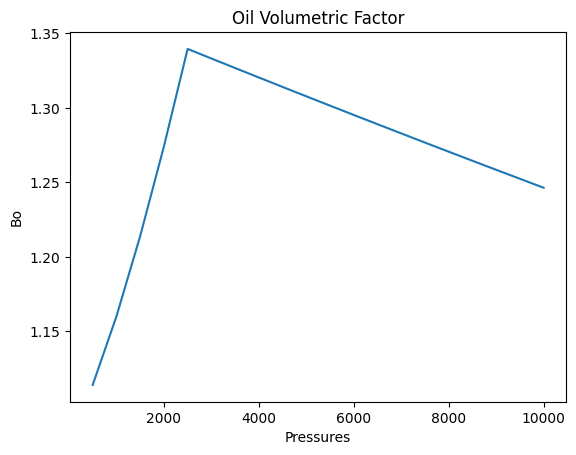

In [15]:
plt.plot(pressures, bo)
plt.title('Oil Volumetric Factor')
plt.xlabel('Pressures')
plt.ylabel('Bo')
plt.show()

In [7]:
bo = Bo.dokla_osman(temperature, rs, api, gamma_gas, P=pressures, Pb=2500, co=9.61e-6)
print(bo)

[1.11765518 1.16503352 1.21599989 1.27076533 1.32931734 1.32294529
 1.31660378 1.31029268 1.30401182 1.29776108 1.29154029 1.28534933
 1.27918804 1.27305628 1.26695392 1.26088081 1.25483681 1.24882178
 1.24283558 1.23687808]


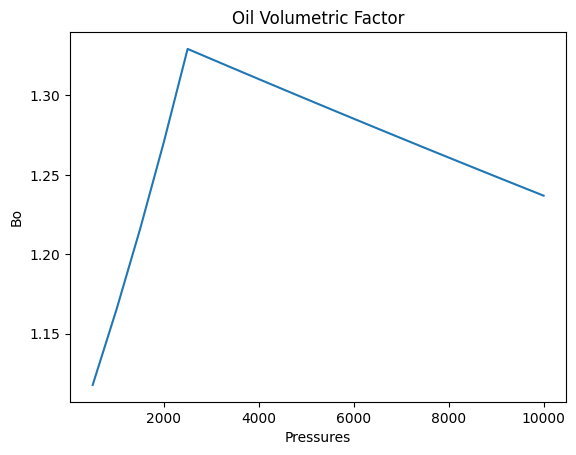

In [17]:
plt.plot(pressures, bo)
plt.title('Oil Volumetric Factor')
plt.xlabel('Pressures')
plt.ylabel('Bo')
plt.show()

### Oil Viscosity

In [4]:
muo = mu_o.mu_oil(pressures, temperature, api, rs, Pb=2500)
print(muo)

[1.8262427 1.4961315 1.21326   0.9853007 0.8068585 0.8195774 0.8322962
 0.8450151 0.8577339 0.8704528 0.8831716 0.8958905 0.9086093 0.9213282
 0.934047  0.9467659 0.9594847 0.9722036 0.9849224 0.9976413]


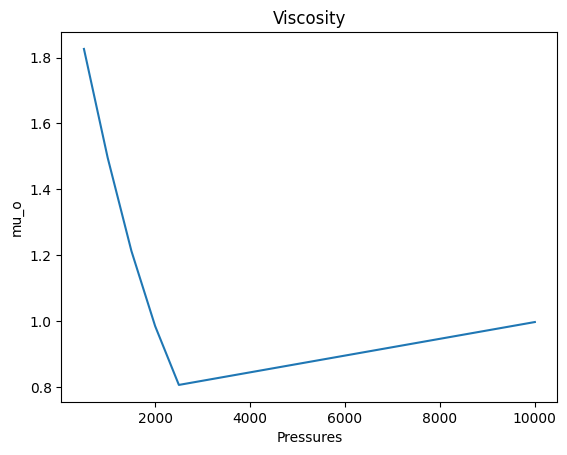

In [5]:
plt.plot(pressures, muo)
plt.title('Viscosity')
plt.xlabel('Pressures')
plt.ylabel('mu_o')
plt.show()

### Oil Density

In [8]:
do = rho_o.ahmed(pressures, 2500, bo, rs, gamma_gas, api)
print(do)

[49.50093 48.63563 47.8093  46.98474 46.15374 46.51324 46.86333 47.20484
 47.53853 47.86512 48.18528 48.49961 48.80868 49.11302 49.4131  49.70938
 50.00225 50.29211 50.5793  50.86413]


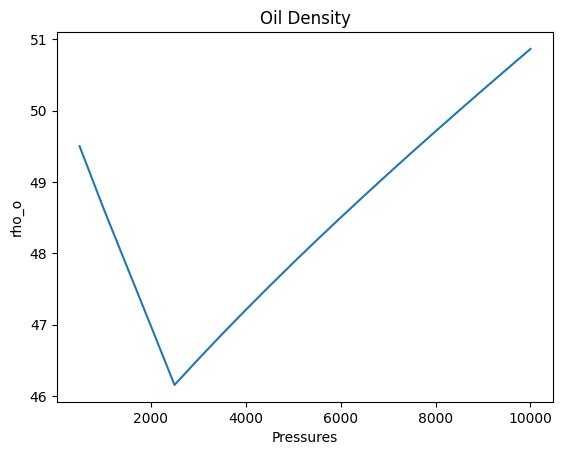

In [9]:
plt.plot(pressures, do)
plt.title('Oil Density')
plt.xlabel('Pressures')
plt.ylabel('rho_o')
plt.show()

### Oil Compressibility

In [18]:
co = c_o.vazquez_beggs(pressures, temperature, api, gamma_gas, rs)
print(co)

[2.67603000e-05 1.85525000e-05 1.61693333e-05 1.51644250e-05
 1.46789200e-05 1.22324333e-05 1.04849429e-05 9.17432500e-06
 8.15495556e-06 7.33946000e-06 6.67223636e-06 6.11621667e-06
 5.64573846e-06 5.24247143e-06 4.89297333e-06 4.58716250e-06
 4.31732941e-06 4.07747778e-06 3.86287368e-06 3.66973000e-06]


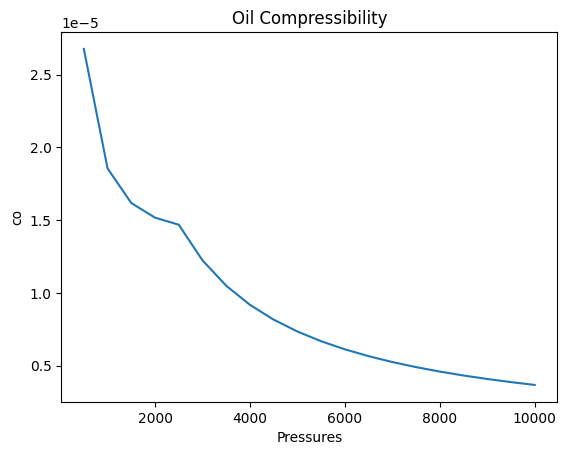

In [19]:
plt.plot(pressures, co)
plt.title('Oil Compressibility')
plt.xlabel('Pressures')
plt.ylabel('co')
plt.show()